# Data Assignment 1

1) **Will Barmby (931150290)**

for *Intermediate Macro*  
W&amp;M ECON 304  

## 1) 

Follow the notebook, [FRED](data-in-python), to answer question 1. You may use GenAI to help with debugging your code.

### a.

Using quarterly data on the GDP: implicit price deflator (FRED: GDPDEF) from 1960Q1-2024Q4, calculate the inflation rate as a year-over-year percent change (i.e., $100\times(P_t/P_{t-4}-1)$). Make a figure of the inflation rate from 1960Q1 to 2025Q2.

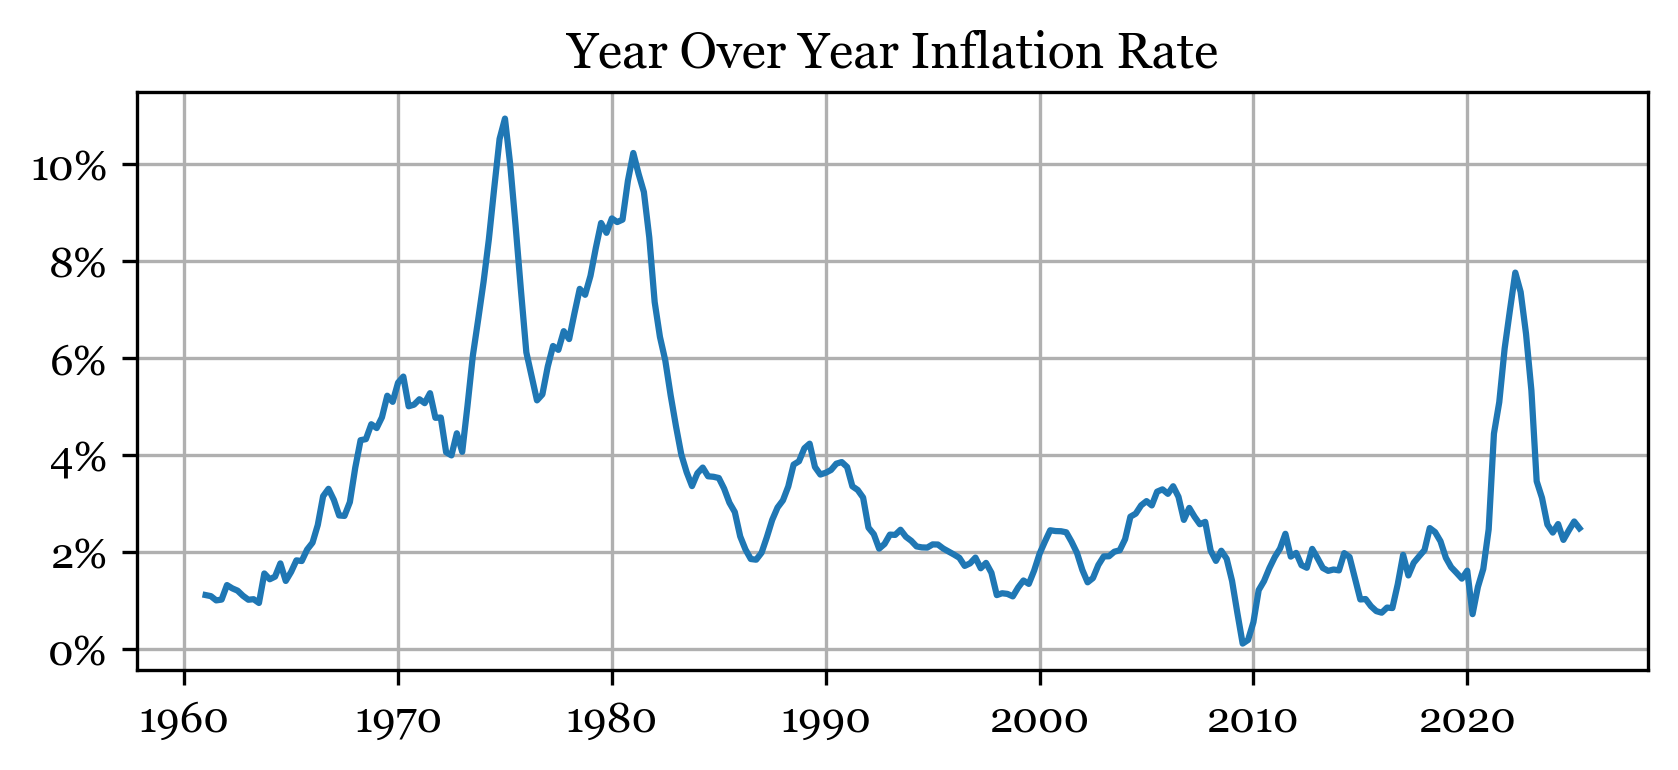

In [76]:
import importlib, utils
utils = importlib.reload(utils)

data, ax = utils.fred_pct_change_graph(
    data_series='GDPDEF',
    data_start='1960-01-01',
    data_end='2025-04-01',
    title= 'Year Over Year Inflation Rate',
    xlabel='',
    ylabel='')

### b.

What is the average inflation rate from 1960Q1 to 1982Q4? from 1983Q1 to 2020Q1? and from 2020Q2 to 2025Q2? What changes in the economy explain the difference between the average inflation rates?

In [81]:
questions = {
        "q1" : {"series" : data.pct_change_label['1960-04-01':'1983-01-01'], "start": "1960Q1", "end" : "1982Q4"},
        "q2" : {"series" : data.pct_change_label['1983-04-01':'2000-04-01'], "start": "1983Q1", "end" : "2020Q1"},
        "q3" : {"series" : data.pct_change_label['2020-07-01':'2025-07-01'], "start": "2020Q2", "end" : "2025Q2"}
}
for q in questions: 
    print(f"From the period {questions[q]['start']} — {questions[q]['end']}, the average inflation rate was {questions[q]['series'].mean():.2f}%")
    
    



From the period 1960Q1 — 1982Q4, the average inflation rate was 5.08%
From the period 1983Q1 — 2020Q1, the average inflation rate was 2.59%
From the period 2020Q2 — 2025Q2, the average inflation rate was 3.95%


- [ ] Answer Questions

## 2) 

Feel free to use GenAI to help with question 2a. Do not use GenAI on question 2b.

### a.

Create a figure (with a legend) that shows the following monthly data from January 1994-July 2025:
- "headline" unemployment rate (FRED: UNRATE) 
- the unemployment rate that includes marginally attached and "underemployed" workers (FRED: U6RATE)

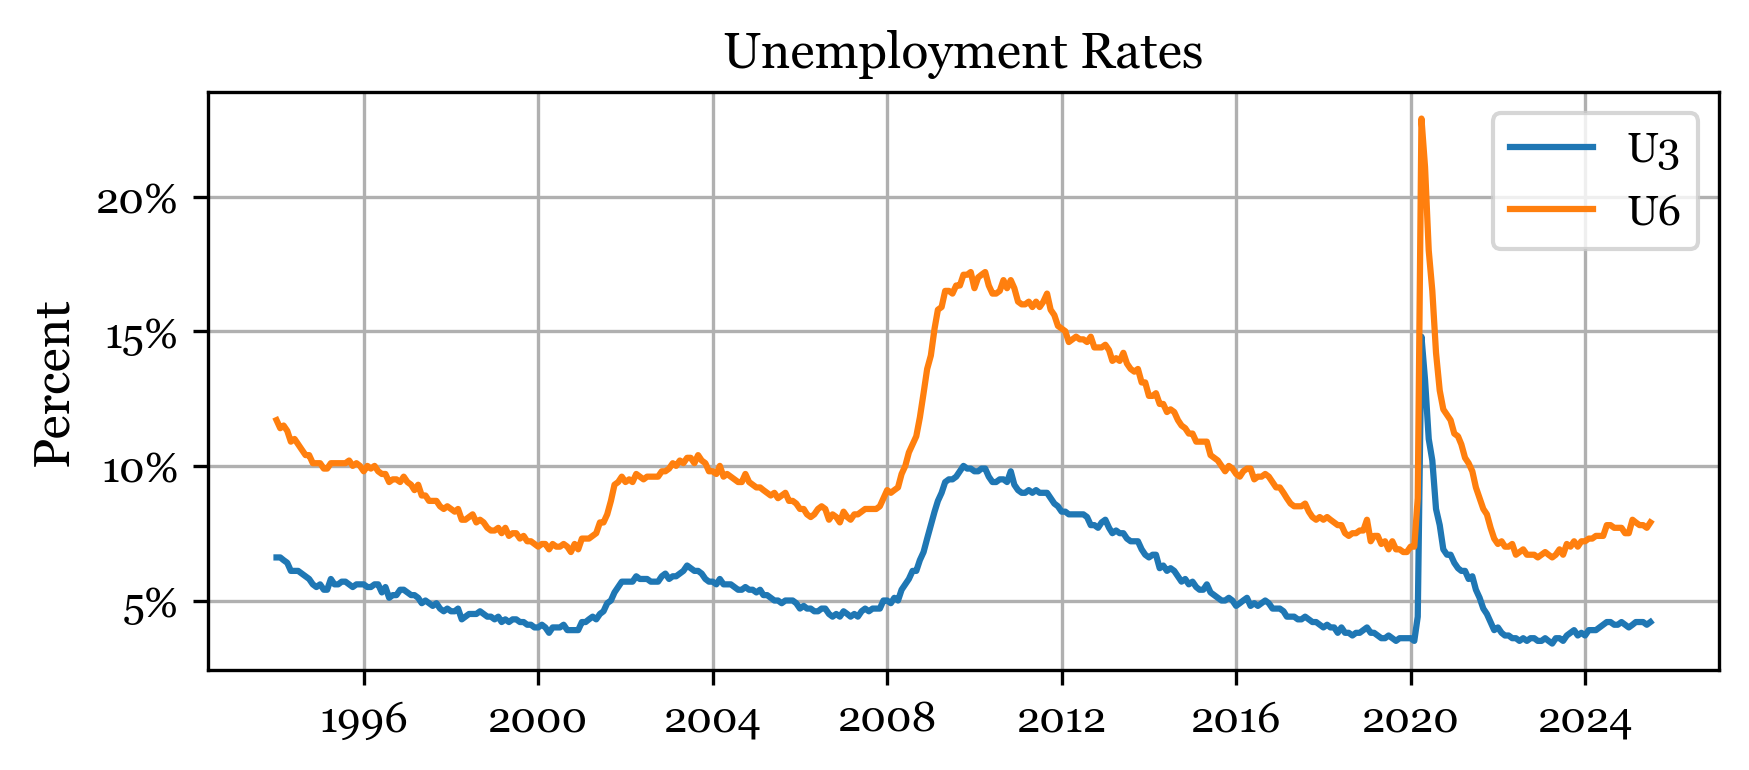

In [86]:
import importlib, utils
utils = importlib.reload(utils)
data, ax = utils.unemp_graphs()

### b.

- In the last 3 recessions, calculate how much the headline unemployment rate increased. (See [NBER Recession Dates](https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions) to see the exact start and end month of each recession).

- Since 2020, what has happened to these unemployment rates?

In [ ]:
from fredapi import Fred
from config import FRED_API_KEY
import pandas as pd
fred = Fred(api_key=FRED_API_KEY)

series_dict = {
"UNRATE": "U3",
"U6RATE": "U6",
}
data_frames = {}
for code, label in series_dict.items():
    s = fred.get_series(code).to_frame(name=label)
    data_frames[label] = s

# align into a single DataFrame
data = pd.concat(data_frames.values(), axis=1)

recessions = {
    'r1' : {'series': data.U3['2001-03-01':'2001-11-01'], 'start' : '2001-03-01', 'end' : '2001-11-01'},
    'r2' : {'series': data.U3['2001-12-01':'2009-06-01'], 'start' : '2001-12-01', 'end' : '2009-06-01'},
    'r3' : {'series': data.U3['2020-02-01':'2020-04-01'], 'start' : '2020-02-01', 'end' : '2020-04-01'}
}
i = 1
for r in recessions:
    starting_rate = recessions[r]['series'][recessions[r]['start']]
    ending_rate = recessions[r]['series'][recessions[r]['end']]
    print(f"For recession {i}, the headline unemployment rate (U3) increased by {(ending_rate-starting_rate):.2f}%")
    i += 1


For recession 1, the headline unemployment rate (U3) increased by 1.20%
For recession 2, the headline unemployment rate (U3) increased by 3.80%
For recession 3, the headline unemployment rate (U3) increased by 11.30%


## 3)

Given what you've done on questions 1 and 2, you shouldn't need GenAI for this question, but you may use it to help with debugging your code for 3a.

### a.

Using monthly data on the civilian labor force participation rate (FRED: CIVPART) and the labor force participation rate for women (FRED: LNS11300002) from January 1960–July 2025, create a figure showing both series over time.

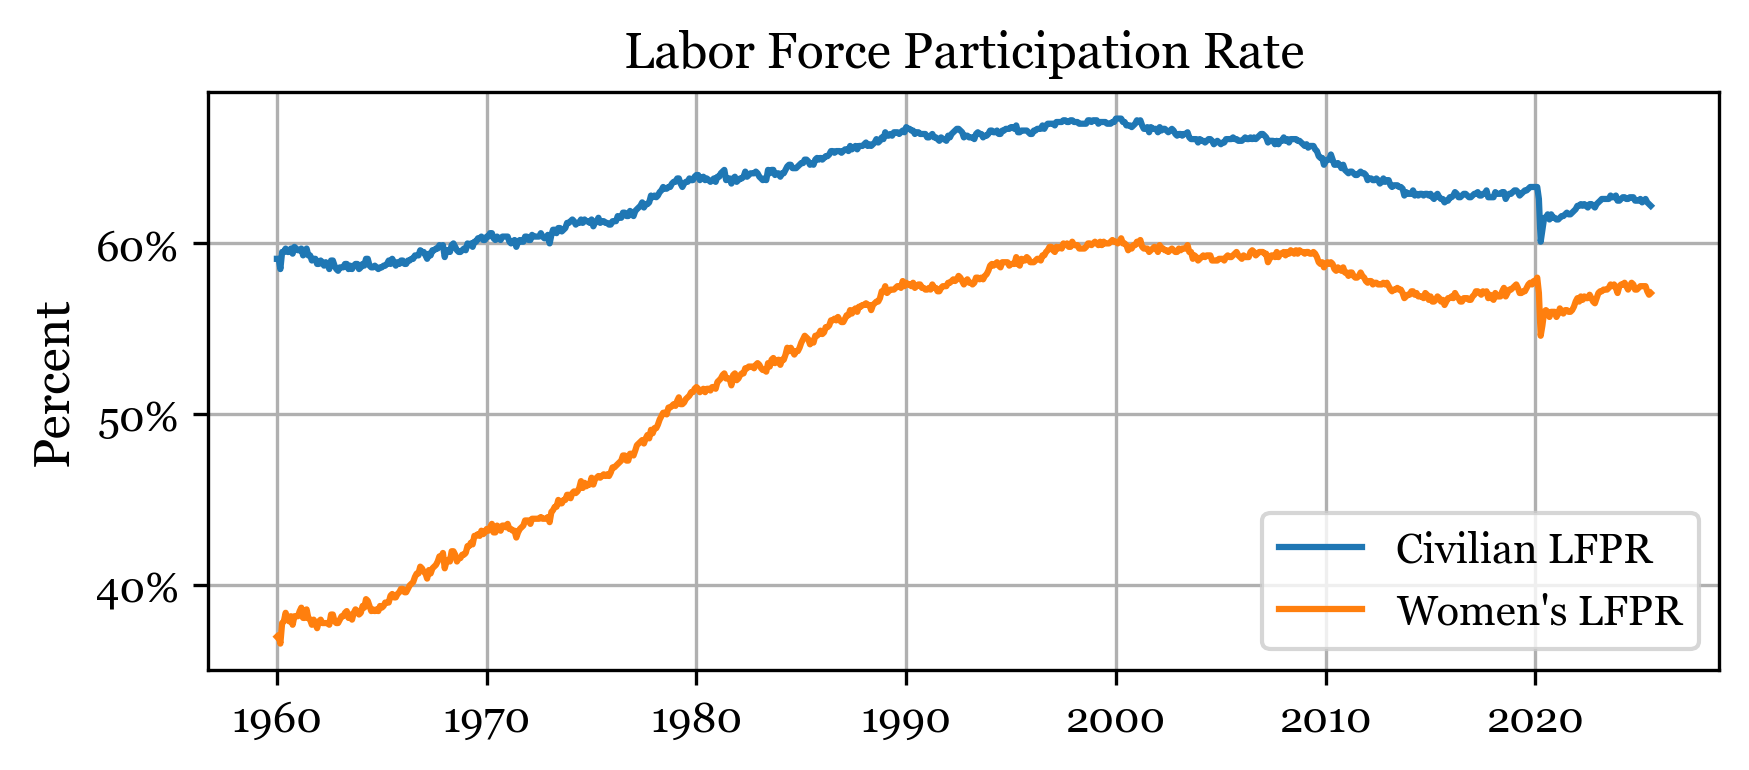

In [99]:
import importlib, utils
utils = importlib.reload(utils)
data, ax = utils.LFPR_graph()
# print(data.tail(5))
# print(data.head(5))

### b.

What long-run trend do you see in total labor force participation? How does the change in women’s labor force participation help explain this trend?